# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(dotenv_path="C:/Users/lesli/Jupyter-Workspace/05-APIs Class 2 (18 June)/.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2

my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
response_btc = requests.get(btc_url) 
response_btc = response_btc.json()
btc_price = response_btc["data"]["1"]["quotes"]["CAD"]['price']

# Fetch current ETH price
# YOUR CODE HERE!

response_eth = requests.get(eth_url) 
response_eth = response_eth.json()
eth_price = response_eth["data"]["1027"]["quotes"]["CAD"]['price']

# Compute current value of my crpto
# YOUR CODE HERE!

my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $36338.98
The current value of your 5.3 ETH is $10696.54


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [8]:
# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!

today = pd.Timestamp("2021-12-02", tz="America/New_York").isoformat() 

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-12-02 05:00:00+00:00,114.65,114.79,114.4001,114.61,7726913,27876,114.538702,AGG
2021-12-02 05:00:00+00:00,450.80,459.07,450.3100,457.40,127500039,1018673,455.707322,SPY


In [10]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2021-12-02 05:00:00+00:00,114.65,114.79,114.4001,114.61,7726913,27876,114.538702


In [11]:
# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])


# Preview DataFrame
# YOUR CODE HERE!

df_ticker

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2021-12-02 05:00:00+00:00  114.65  114.79  114.4001  114.61  7726913   

                                                     SPY                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2021-12-02 05:00:00+00:00       27876  114.538702  450.8  459.07  450.31   

                                                                     
                           close     volume trade_count        vwap  
timestamp                                                            
2021-12-02 05:00:00+00:00  457.4  127500039     1018673  455.707322

In [12]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.61
Current SPY closing price: $457.4


In [13]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = agg_close_price * my_spy
my_agg_value = spy_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5730.50
The current value of your 200 AGG shares is $91480.00


### Savings Health Analysis

In [14]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
crypto_amount = float(my_btc_value + my_eth_value)
shares_amount = float(my_spy_value + my_agg_value)

# Create savings DataFrame
# YOUR CODE HERE!

df_savings = pd.DataFrame([crypto_amount, shares_amount], index=tickers, columns = ['amount'])


# Display savings DataFrame
display(df_savings)

,amount
AGG,47035.519225
SPY,97210.500000


<AxesSubplot:title={'center':'composition of personal savings'}, ylabel='amount'>

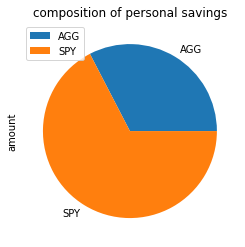

In [15]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y="amount", title="composition of personal savings") 

In [16]:
# Set ideal emergency fund
emergency_fund = float(monthly_income * 3)
# Calculate total amount of savings
# YOUR CODE HERE!
savings_amount = float(crypto_amount + shares_amount)
# Validate saving health
# YOUR CODE HERE!
if savings_amount > emergency_fund :
    print("Congratulating for having enough money in this fund.")
elif savings_amount == emergency_fund :
    print("Congratulating on reaching the financial goal.")
elif savings_amount < emergency_fund :
    print(f"you are {emergency_fund - savings_amount} dollars away from reaching the goal.")

Congratulating for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!'
tickers = ["SPY","AGG"]

timeframe = "1Day"

df_stock_data = alpaca.get_bars(tickers, timeframe, start = start_date, end = end_date).df

df_stock_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG
...,...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,417.42,418.2200,416.8111,417.61,52076360,295872,417.505200,SPY
2021-04-27 04:00:00+00:00,417.97,418.1400,416.3000,417.52,50324187,296302,417.481280,SPY
2021-04-28 04:00:00+00:00,417.84,419.0100,416.9000,417.40,50692843,330050,417.742098,SPY


In [19]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_ticker

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.90  208.18  206.4100  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.2800  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.4200  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.4700  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.8800  205.70   89131004   
...                           ...     ...       ...     ...        ...   
2021-04-26 04:00:00+00:00  417.42  418.22  416.8111  417.61   52076360   
2021-04-27 04:00:00+00:00  417.97  418.14  416.3000  417.52   50324187   
2021-04-28 04:00:00+00:00  417.84  419.01  416.9000  417.40   50692843   
2021-04-29 04:00:00+00:00  420.38  420.72  416.4400  420.06   77056617   
2021-04-30 04:00:00+00:00  417.67  418.54  416.3400  417.30   84731942   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   
...                               ...         ...     ...       ...       ...   
2021-04-26 04:00:00+00:00      295872  417.505200  114.74  114.8015  114.6500   
2021-04-27 04:00:00+00:00      296302  417.481280  114.60  115.1300  114.3700   
2021-04-28 04:00:00+00:00      330050  417.742098  114.45  114.4685  114.2000   
2021-04-29 04:00:00+00:00      443399  418.825111  114.14  114.3700  114.0900   
2021-04-30 04:00:00+00:00      478844  417.651995  114.41  114.5150  114.3300   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967  
...                           ...      ...         ...         ...  
2021-04-26 04:00:00+00:00  114.65  3480337       13521  114.706244  
2021-04-27 04:00:00+00:00  114.37  3820640       12720  114.498315  
2021-04-28 04:00:00+00:00  114.43  7075831       24303  114.379810  
2021-04-29 04:00:00+00:00  114.37  6208142       21096  114.250702  
2021-04-30 04:00:00+00:00  114.49  6469432       19582  114.456246  

[1259 rows x 14 columns]

In [20]:
df_ticker

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.90  208.18  206.4100  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.2800  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.4200  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.4700  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.8800  205.70   89131004   
...                           ...     ...       ...     ...        ...   
2021-04-26 04:00:00+00:00  417.42  418.22  416.8111  417.61   52076360   
2021-04-27 04:00:00+00:00  417.97  418.14  416.3000  417.52   50324187   
2021-04-28 04:00:00+00:00  417.84  419.01  416.9000  417.40   50692843   
2021-04-29 04:00:00+00:00  420.38  420.72  416.4400  420.06   77056617   
2021-04-30 04:00:00+00:00  417.67  418.54  416.3400  417.30   84731942   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   
...                               ...         ...     ...       ...       ...   
2021-04-26 04:00:00+00:00      295872  417.505200  114.74  114.8015  114.6500   
2021-04-27 04:00:00+00:00      296302  417.481280  114.60  115.1300  114.3700   
2021-04-28 04:00:00+00:00      330050  417.742098  114.45  114.4685  114.2000   
2021-04-29 04:00:00+00:00      443399  418.825111  114.14  114.3700  114.0900   
2021-04-30 04:00:00+00:00      478844  417.651995  114.41  114.5150  114.3300   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967  
...                           ...      ...         ...         ...  
2021-04-26 04:00:00+00:00  114.65  3480337       13521  114.706244  
2021-04-27 04:00:00+00:00  114.37  3820640       12720  114.498315  
2021-04-28 04:00:00+00:00  114.43  7075831       24303  114.379810  
2021-04-29 04:00:00+00:00  114.37  6208142       21096  114.250702  
2021-04-30 04:00:00+00:00  114.49  6469432       19582  114.456246  

[1259 rows x 14 columns]

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_even_dist = MCSimulation(
    portfolio_data = df_ticker.copy(),
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30)

In [22]:
# Printing the simulation input data
# YOUR CODE HERE!

MC_even_dist.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_even_dist.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993124,1.004406,1.000734,0.999771,1.006795,1.010568,0.994902,1.004147,1.011615,1.016235,...,1.004366,1.015167,0.992663,0.984694,0.998661,0.997514,1.009759,0.991769,1.003005,1.001173
2,1.004838,1.005281,1.006658,1.014655,1.008088,1.012048,1.001256,1.005243,1.005416,1.024072,...,1.000214,1.029423,0.987521,0.998837,0.991021,0.997573,1.000270,0.993921,0.998787,1.003371
3,1.007358,1.003533,1.000953,1.016926,0.996655,1.013883,1.002318,1.015460,1.031148,1.022831,...,0.997306,1.034069,0.977673,1.000051,0.999372,1.006011,1.004337,0.997991,1.018871,1.002773
4,1.006760,0.999553,0.996441,1.000129,0.999431,1.014020,0.997510,1.011861,1.035317,1.032443,...,0.999334,1.034745,0.982757,0.995762,1.003541,1.016799,0.994368,0.994234,1.025491,0.994218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.408497,9.448973,5.760762,7.050645,10.814228,18.290254,9.862664,13.805118,5.955968,7.687163,...,7.744568,18.535070,22.962643,36.147510,29.024488,14.899818,29.732852,41.040182,19.236362,24.554312
7557,15.597869,9.591732,5.745053,7.008588,10.873554,18.357425,9.976308,14.009515,5.900608,7.662150,...,7.734674,18.446310,23.158070,36.091932,29.159016,14.835052,29.897783,41.128873,19.160412,24.798063
7558,15.613852,9.540821,5.858368,7.054611,10.876486,18.291895,9.997381,14.110453,5.897367,7.747747,...,7.685789,18.381038,23.125136,36.148803,29.062452,14.745341,30.063662,41.196752,19.222709,24.670974
7559,15.549013,9.492355,5.917857,7.005942,10.931293,18.488711,9.874130,14.254123,5.957080,7.823429,...,7.514758,18.253248,22.940542,35.842530,29.177615,14.831497,30.103584,41.742916,19.139245,24.670828


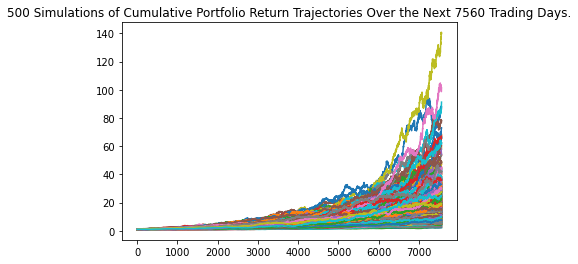

In [24]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_even_dist.plot_simulation()

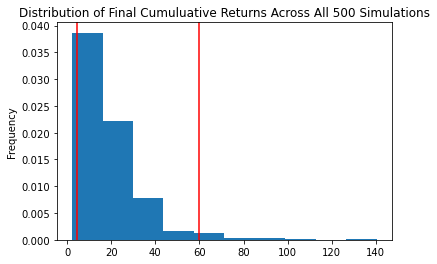

In [25]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

even_tbl = MC_even_dist.summarize_cumulative_return()



# Print summary statistics
# YOUR CODE HERE!

print(even_tbl)

count           500.000000
mean             19.137056
std              14.635552
min               2.240694
25%              10.082304
50%              15.145933
75%              23.473067
max             140.376660
95% CI Lower      4.659019
95% CI Upper     59.817353
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment projet 50K
initial_investment = 20000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93180.38 and $1196347.06


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment 50 000
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(even_tbl[8]*15000,2)
ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $69885.28 and $897260.3


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_att = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.60,.20],
    num_simulation = 200,
    num_trading_days = 252*5)

MC_att.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_att.calc_cumulative_return()

Running Monte Carlo simulation number 0.


ValueError: Dot product shape mismatch, (1261, 2) vs (3,)

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

att_line_plot = MC_att.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

att_dist_plot = MC_att.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

att_tbl = MC_att.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(att_tbl)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 15000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")